In [741]:
#imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nlp imports
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import spacy



from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier,StackingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier


from colorama import Fore
from colorama import Style






import regex as re
pd.set_option('max_colwidth', 400)




from logging import raiseExceptions

In [774]:
df=pd.read_csv("../data/df_submissions.csv")
# df=pd.read_csv("../data/df_submissions_2nd.csv")
# df=pd.read_csv("../data/df_comments.csv")

df.head()

,comment,sex
0,happen today tell friend talk I like therapy feel like good thing I think experience,1
1,turn woman want hook man date couple day want unsettle woman want hook date kind impression sleep want impression type,1
2,parent family holiday spot dinner ask date life tell date pretty busy career hang friend relationship deal feel pretty shitty reaction weird age marry relationship feeling leave friend single vibe friend family relationship past year wrong damage good,1
3,ask exchange despite profile curious read profile write,1
4,intention send people,1


In [776]:
X=df["comment"]
y=df["sex"]

In [777]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [778]:
#Baseline accuracy
y_test.value_counts(normalize=True)

1    0.505429
0    0.494571
Name: sex, dtype: float64

In [742]:
def calculate(estimator):
    tn,fp,fn,tp=confusion_matrix(y_test,estimator.predict(X_test)).ravel()
    fig, (ax1, ax2)=plt.subplots(2,1, figsize=(6,10))
    plot_confusion_matrix(estimator,X_test,y_test,display_labels=["man","woman"],ax=ax1)
    baseline=y_test.value_counts(normalize=True)
    return \
        print(f'Baseline accuracy :{Fore.GREEN} {baseline[1]}{Style.RESET_ALL}'),\
        print(f'Best estimator :{Fore.GREEN} {estimator.best_estimator_}{Style.RESET_ALL}'),\
        print('=' * 30),\
        print(f'Best score : {Fore.GREEN} {estimator.best_score_}{Style.RESET_ALL}'),\
        print('=' * 30),\
        print(f'Best parameters :{Fore.GREEN} {estimator.best_params_}{Style.RESET_ALL}'),\
        print('=' * 30),\
        print(f'X_train Score :{Fore.GREEN} {estimator.score(X_train,y_train)}{Style.RESET_ALL}'),  print(f'X_test Score  :{Fore.GREEN} {estimator.score(X_test,y_test)}{Style.RESET_ALL}'),\
        print('=' * 30),\
        print(f"F1 Train Score:{Fore.GREEN} {f1_score(y_train,estimator.predict(X_train))}{Style.RESET_ALL}"),\
        print(f"F1 Test Score:{Fore.GREEN} {f1_score(y_test,estimator.predict(X_test))}{Style.RESET_ALL}"),\
        print(f"Sensitivity:{Fore.GREEN} {round(tp/(tp+fn),4)}{Style.RESET_ALL}"),\
        print(f"Specificity: {Fore.GREEN}{round((tn/(tn+fp)),4)}{Style.RESET_ALL}"),\
        print(f"Precision  :{Fore.GREEN} {round((tp/(tp+fp)),4)}{Style.RESET_ALL}"),\
        print('=' * 30),\
        print('=' * 30),\
        plot_roc_curve(estimator,X_test,y_test,ax=ax2);



In [650]:
def get_df_pred(estimator):
    log_reg_predict=estimator.predict(X_test)
    X_test_pred=pd.DataFrame(X_test)
    X_test_pred["real"]=y_test
    X_test_pred.reset_index(inplace=True)
    X_test_pred['predicted']=log_reg_predict
    return X_test_pred

In [19]:
import textstat
textstat.dale_chall_readability_score()

Lemmatizing through SPACY
Check Similarity of documents

textstat library can be useful, readability score david chale

expand contractions\

POS Tagging\
proper names\
remove duplicates\


After EDA\

drop documents above\below length IQR


take some correct and incorrect classified submissions after modeling (from confusion matrix)

- First steps
    - take a glance at head/sample
    - to consider: maintain raw data
- Considerations
    - Regex cleaning
        - punctuation
        - emoticon/emoji
        - digits
        - remove urls
        - extra spaces
    - expand contractions
    - lowercase
    - POS tagging
    - proper names
    - remove duplicates (submissions)
    - removed/redacted/deleted posts
- After EDA
    - remove documents above/below length (IQR)

----

First test on all of the next models was not very good.
Stacking with CountVectorizer 0.9902692182938696 0.6303501945525292
AdaBoost + TFIF  0.7697048329549141 0.6313229571984436
Randon Forest +TFIDF 0.957833279273435 0.6575875486381323
Bagging+TFIDF 0.9938371715861174 0.6186770428015564
DecisionTree + TFIDF 0.727538112228349 0.6011673151750972
Naive Bayes + CountVectorizer 0.7745702238079792 0.5787937743190662
Logistic Regression 0.9072332144015569 0.603112840466926


Second attempt was with clean Bag of Words. I've dropped all possible stopwords and all of the connections. 
Baseline 
1    0.582527
0    0.417473
Stacking with CountVectorizer 0.6386243914973804 0.5950749464668095
AdaBoost + TFIF  0.6461905237762138 0.5838115631691649
Random Forest +TFIDF 0.6461476966123714 0.5862098501070664
Bagging+TFIDF 0.6449628117460635 0.586252676659529
DecisionTree + TFIDF 0.5889877086039772 0.586509635974304
Naive Bayes + CountVectorizer 0.6217504889434539 0.0.5877087794432548
Logistic Regression 0.6037773558509044 0.5842398286937901


Third attempt was with comments. Except basic no additional cleaning.

Baseline Accuracy
1    0.544444
0    0.455556


Stacking with CountVectorizer 0.9828167115902965 0.6363636363636364
AdaBoost + TFIF  0.7240566037735849 0.6050505050505051
Random Forest +CountVectorizer 0.851078167115903 0.6050505050505051
Bagging+TFIDF 0.9740566037735849 0.5898989898989899
DecisionTree + TFIDF 0.6765498652291105 0.5797979797979798
Naive Bayes + CountVectorizer 0.7934636118598383 0.6353535353535353
Logistic Regression 0.8733153638814016 0.6191919191919192


Forth attempt with wider range of ngram.

Baseline Accuracy
1    0.5
0    0.5


Stacking with CountVectorizer 0.9828167115902965 0.6363636363636364
AdaBoost + TFIF  0.7064547518650665 0.6108949416342413
Random Forest +CountVectorizer 0.9948102497567305 0.6138132295719845
Bagging+TFIDF 0.9967564060979566 0.6284046692607004
DecisionTree + TFIDF 0.8799870256243918 0.6050583657587548
Naive Bayes + CountVectorizer 0.7833279273434965 0.5933852140077821
Logistic Regression 0.9292896529354525 0.6206225680933852


#### Logistic Regression + CountVectorizer through GridSearch

In [779]:
log_pipe=Pipeline([
('cvec',CountVectorizer()),
('log_reg',LogisticRegression(random_state=42,max_iter=1000))
])

pipe_params={
    'cvec__max_features':[1000,2000,3000,5000],
    # # 'cvec__min_df':[0.0001,0.0002],
    # 'cvec__max_df':[0.95,0.99,1],
    'cvec__ngram_range':[(1,2),(1,3),(2,2),(3,3)],
    'log_reg__penalty':['l1','l2'],
    # 'log_reg__C':[1,5,10,20]
}


In [780]:
log_grid=GridSearchCV(
    log_pipe,
    param_grid=pipe_params,
    n_jobs=-1,
    cv=3,
    verbose=1
)

log_grid.fit(X_train,y_train);

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/Users/glebradchenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/glebradchenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/glebradchenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/glebradchenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logist

Baseline accuracy : 0.5054294175715696
Best estimator : Pipeline(steps=[('cvec',
                 CountVectorizer(max_features=5000, ngram_range=(1, 3))),
                ('log_reg',
                 LogisticRegression(max_iter=1000, random_state=42))])
Best score :  0.6222002635046114
Best parameters : {'cvec__max_features': 5000, 'cvec__ngram_range': (1, 3), 'log_reg__penalty': 'l2'}
X_train Score : 0.932806324110672
X_test Score  : 0.629812438302073
F1 Train Score: 0.9302802460697198
F1 Test Score: 0.5980707395498392
Sensitivity: 0.5449
Specificity: 0.7166
Precision  : 0.6627


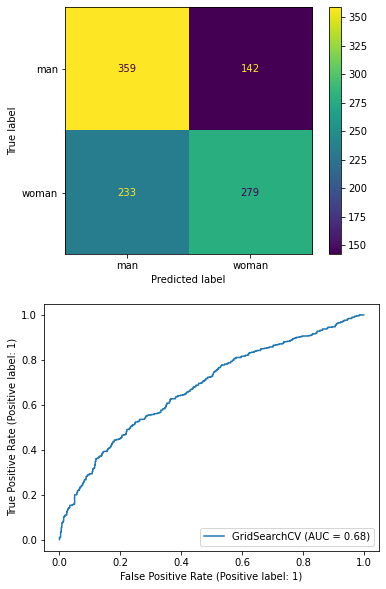

In [781]:
calculate(log_grid);

#### Naive Bayes + CountVectorizer through GridSearch

In [782]:
nb_pipe=Pipeline([
('cvec',CountVectorizer(stop_words=stop_words)),
('nb',MultinomialNB())
])
nb_pipe_params={
'cvec__min_df':[2,3],
'cvec__max_df':[0.95,0.98,1],
'cvec__ngram_range':[(1,2),(2,2),(2,3),(3,3)],
'cvec__stop_words':['english', None],
'cvec__max_features':[1000,2000,3000],
'cvec__ngram_range':[(1,1),(1,2)]

}

In [783]:
nb_grid=GridSearchCV(nb_pipe,
param_grid=nb_pipe_params,
cv=3,
verbose=1,
n_jobs=-1
)
nb_grid.fit(X_train,y_train);


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/glebradchenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/glebradchenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/glebradchenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/glebradchenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 355, in _fit
   

Baseline accuracy : 0.5
Best estimator : Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.95, max_features=3000, min_df=3)),
                ('nb', MultinomialNB())])
Best score :  0.5966277561608301
Best parameters : {'cvec__max_df': 0.95, 'cvec__max_features': 3000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
X_train Score : 0.7613488975356679
X_test Score  : 0.5836575875486382
Sensitivity: 0.607
Specificity: 0.5603
Precision  : 0.5799


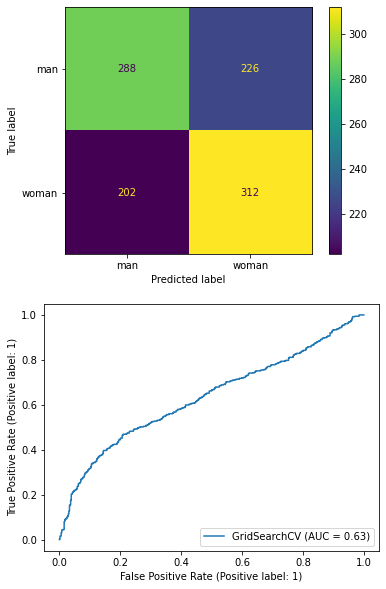

In [707]:
calculate(nb_grid);

More mistakes on AskMan subreddit. Model is not far from baseline accuracy.

That is not very good. Area under the curve is pretty close to diagonal, that means, that our two classes are very overlapped, and model is struggling to distinguish male and female classes one from another.

#### Decision Tree with TFIDF through GridSearchCV

In [797]:
d_tree_pipe=Pipeline([
('tf',TfidfVectorizer()),
('dt',DecisionTreeClassifier())
])

d_tree_pipe_params={
'tf__stop_words':[None],
'tf__ngram_range':[(1,1),(1,2),(1,3),(2,3)],
# 'tf__max_df':[0.9,0.95,0.98],
# 'tf__min_df':[2,3,4,5],
'dt__max_depth':[9,10,11],
'dt__min_samples_split':[8,10,13],
'dt__min_samples_leaf':[8,10,13]


}

In [798]:
d_tree_grid=GridSearchCV(d_tree_pipe,param_grid=d_tree_pipe_params,cv=3,n_jobs=-1,verbose=1)
d_tree_grid.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [9, 10, 11],
                         'dt__min_samples_leaf': [8, 10, 13],
                         'dt__min_samples_split': [8, 10, 13],
                         'tf__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 3)],
                         'tf__stop_words': [None]},
             verbose=1)

Baseline accuracy : 0.5054294175715696
Best estimator : Pipeline(steps=[('tf', TfidfVectorizer()),
                ('dt',
                 DecisionTreeClassifier(max_depth=9, min_samples_leaf=13,
                                        min_samples_split=8))])
Best score :  0.6136363636363636
Best parameters : {'dt__max_depth': 9, 'dt__min_samples_leaf': 13, 'dt__min_samples_split': 8, 'tf__ngram_range': (1, 1), 'tf__stop_words': None}
X_train Score : 0.66600790513834
X_test Score  : 0.5972359328726555
F1 Train Score: 0.5666666666666667
F1 Test Score: 0.46174142480211083
Sensitivity: 0.3418
Specificity: 0.8583
Precision  : 0.7114


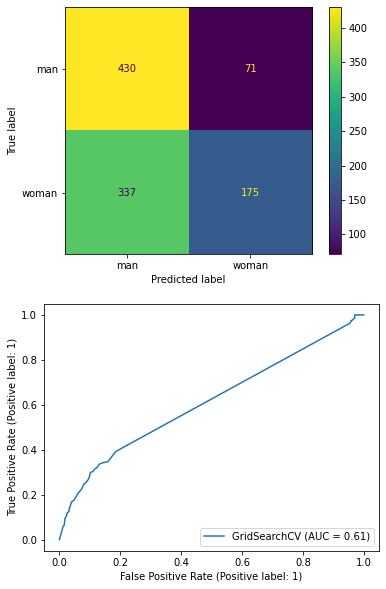

In [799]:
calculate(d_tree_grid);

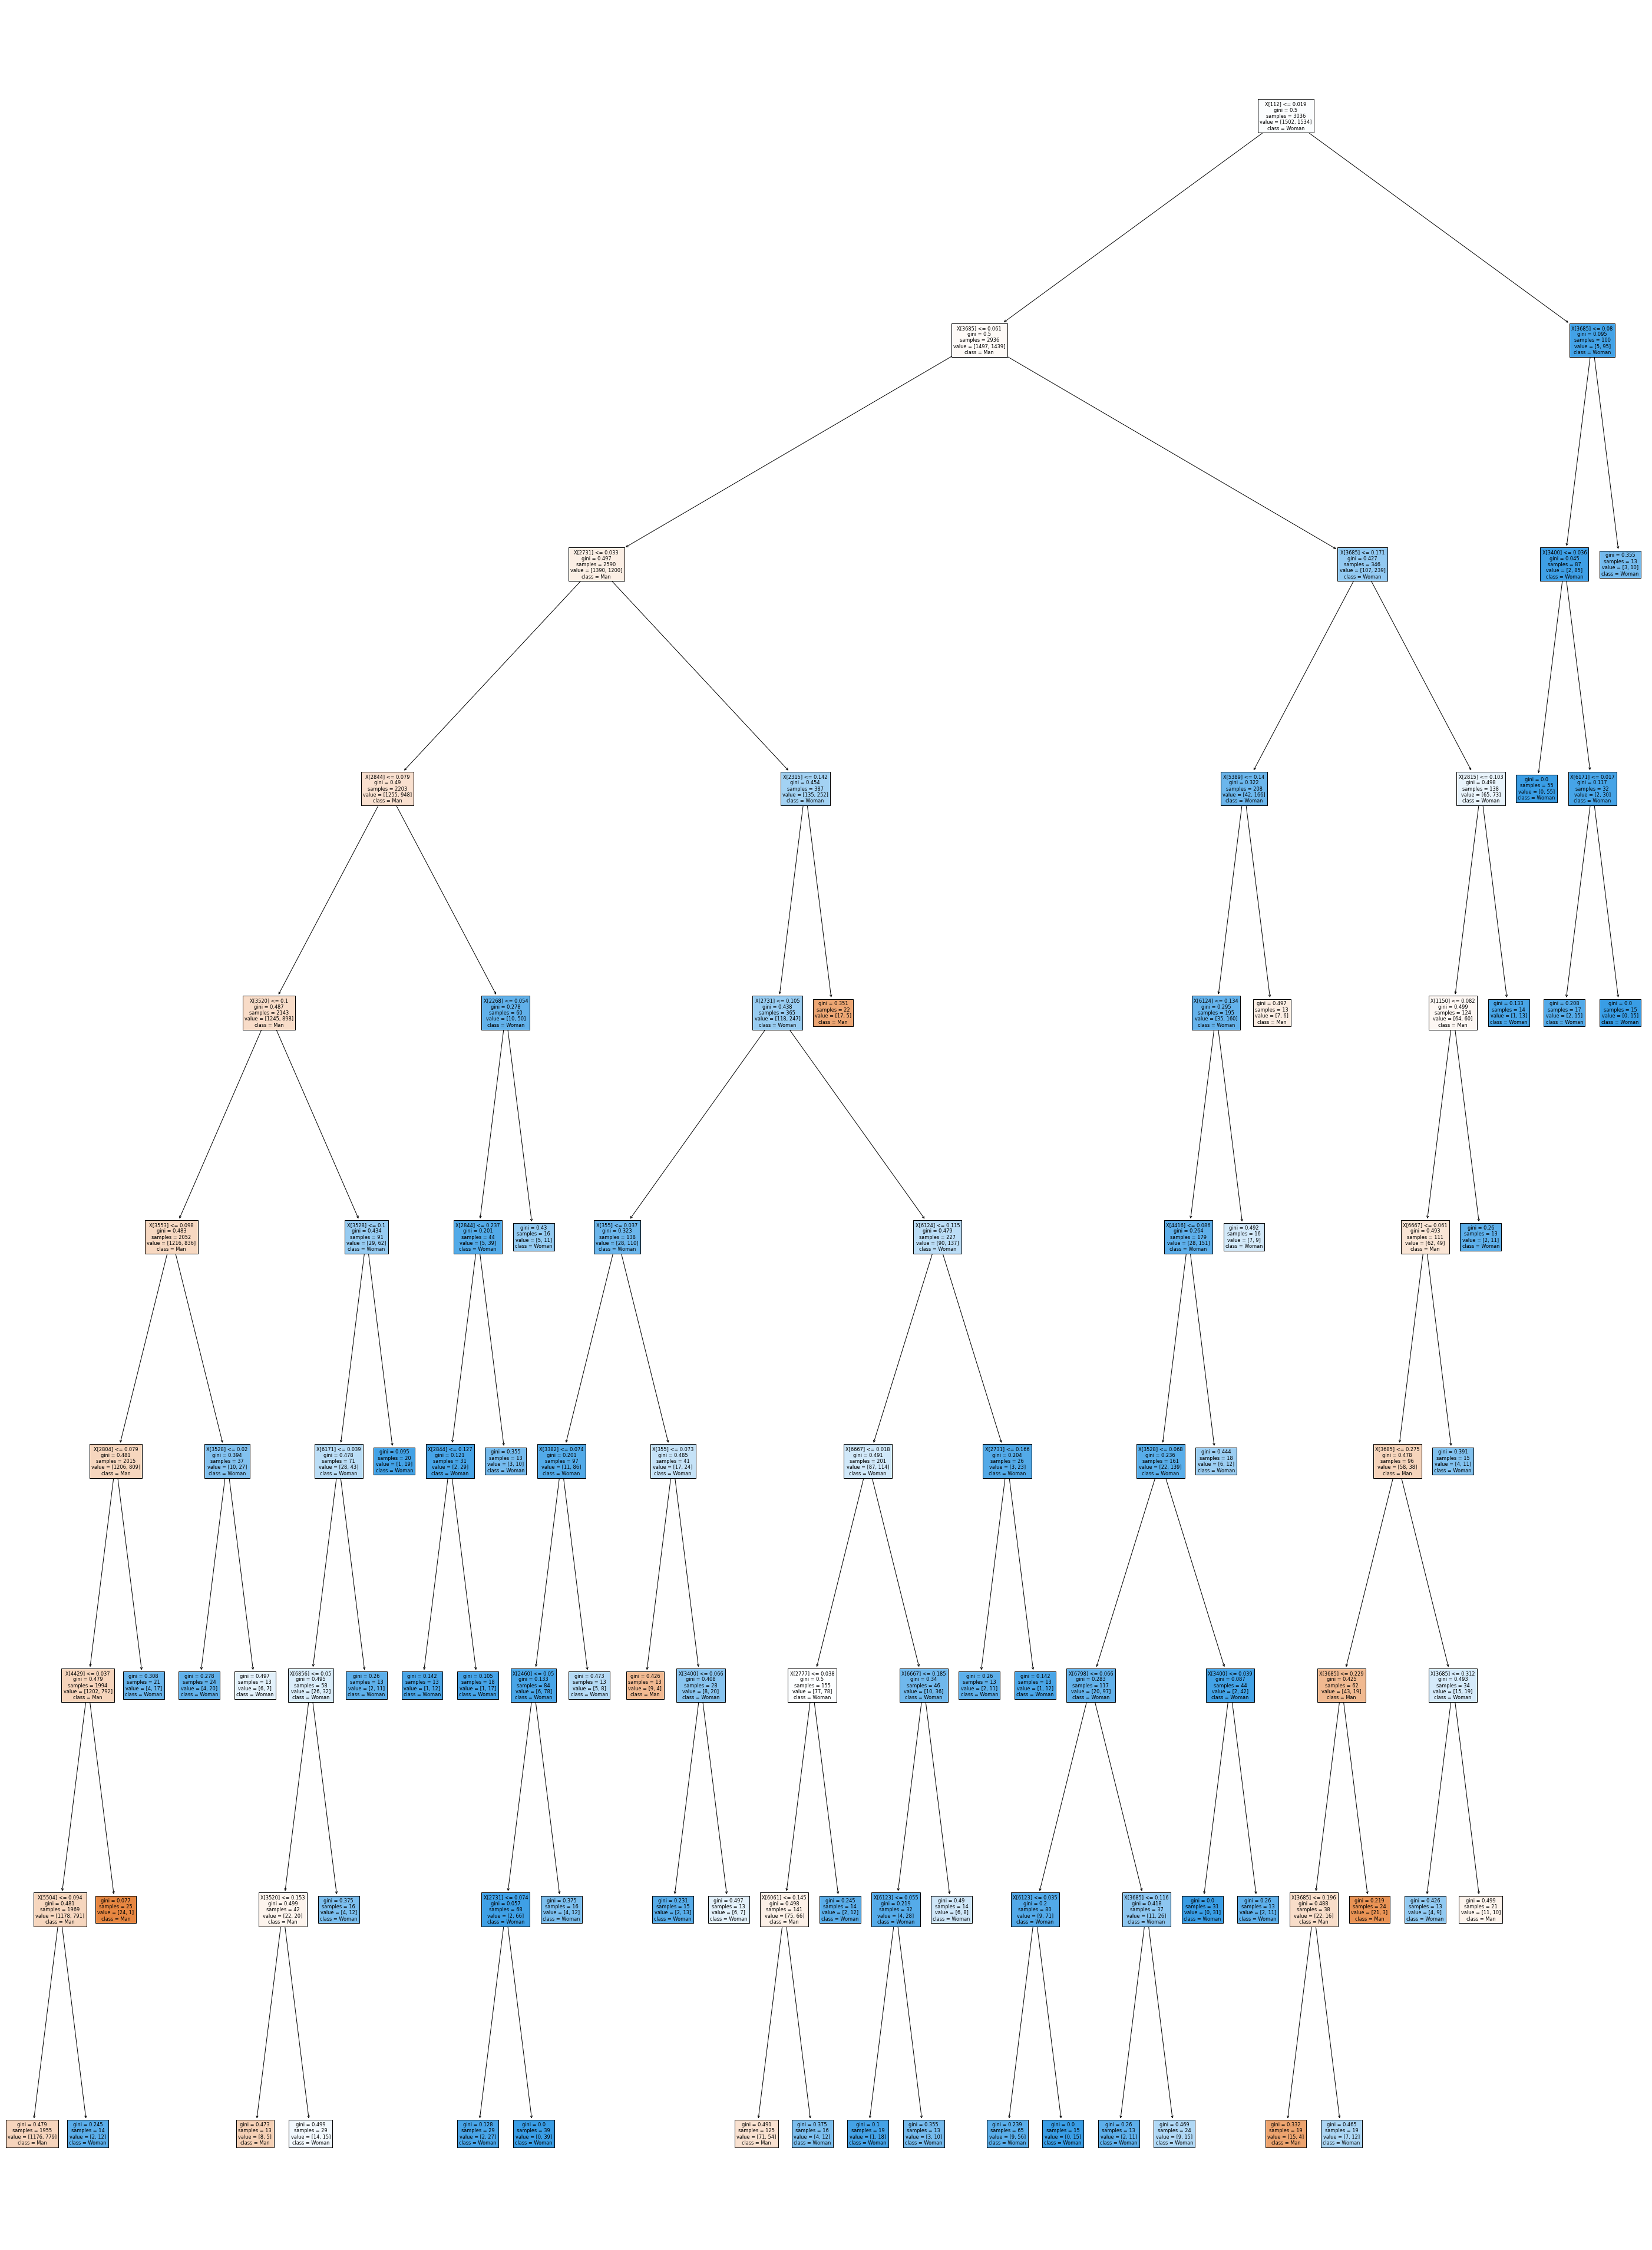

In [800]:
plt.figure(figsize = (50, 70))

# Plot our tree.
plot_tree(d_tree_grid.best_estimator_["dt"],
        #   feature_names = "X_train.name",
          class_names = ['Man', 'Woman'],
          filled = True);

#### TFDIDF + Bagging through GridSeardchCV

In [801]:
bag_pipeline=Pipeline([
    ('tf',TfidfVectorizer()),
    ('bag',BaggingClassifier(random_state=42))
])
bag_pipeline_params={
'tf__stop_words':[None],
'tf__ngram_range':[(1,3),(1,4),(2,2)],
# 'tf__max_df':[0.9,0.95,0.98],
# 'tf__min_df':[2,3,4,5],
'bag__n_estimators':[5,20,60,100]
}

In [802]:
bag_grid=GridSearchCV(bag_pipeline,param_grid=bag_pipeline_params,cv=3, verbose=1,n_jobs=-1)
bag_grid.fit(X_train,y_train);

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Baseline accuracy : 0.5054294175715696
Best estimator : Pipeline(steps=[('tf', TfidfVectorizer(ngram_range=(1, 3))),
                ('bag', BaggingClassifier(n_estimators=5, random_state=42))])
Best score :  0.6017786561264823
Best parameters : {'bag__n_estimators': 5, 'tf__ngram_range': (1, 3), 'tf__stop_words': None}
X_train Score : 0.9496047430830039
X_test Score  : 0.5844027640671273
F1 Train Score: 0.9497206703910616
F1 Test Score: 0.5768844221105528
Sensitivity: 0.5605
Specificity: 0.6088
Precision  : 0.5942


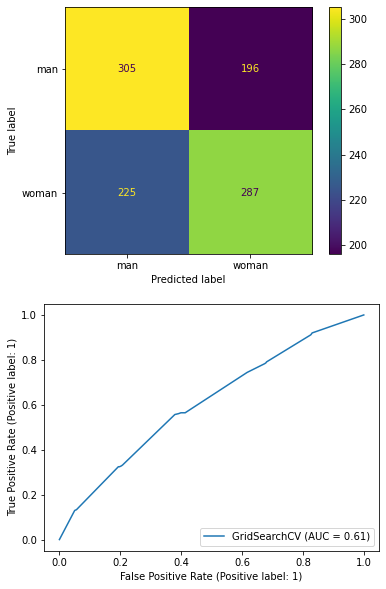

In [806]:
calculate(bag_grid);

#### RandomForest + CountVectorizer through GridSearchCV

In [807]:
rand_pipeline=Pipeline([
    ('cv',CountVectorizer()),
    ('rand',RandomForestClassifier(random_state=42))
])
rand_pipeline_params={
# 'cv__stop_words':[None],
'cv__ngram_range':[(1,2),(1,3),(1,4),(1,5)],
'cv__max_features':[500,2000],
'cv__max_df':[0.05,0.1,0.2,0.3],
# 'cv__min_df':[2,5,10],
# 'rand__n_estimators':[100,400],
# 'rand__max_depth':[None,1,3],
'rand__min_samples_split':[2,6],
'rand__min_samples_leaf':[1,2,3]
}

In [808]:
rand_grid=GridSearchCV(rand_pipeline,param_grid=rand_pipeline_params,cv=3,verbose=1,n_jobs=-1)
rand_grid.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('rand',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'cv__max_df': [0.05, 0.1, 0.2, 0.3],
                         'cv__max_features': [500, 2000],
                         'cv__ngram_range': [(1, 2), (1, 3), (1, 4), (1, 5)],
                         'rand__min_samples_leaf': [1, 2, 3],
                         'rand__min_samples_split': [2, 6]},
             verbose=1)

Baseline accuracy : 0.5054294175715696
Best estimator : Pipeline(steps=[('cv',
                 CountVectorizer(max_df=0.3, max_features=2000,
                                 ngram_range=(1, 3))),
                ('rand',
                 RandomForestClassifier(min_samples_leaf=2, min_samples_split=6,
                                        random_state=42))])
Best score :  0.6492094861660079
Best parameters : {'cv__max_df': 0.3, 'cv__max_features': 2000, 'cv__ngram_range': (1, 3), 'rand__min_samples_leaf': 2, 'rand__min_samples_split': 6}
X_train Score : 0.9074440052700923
X_test Score  : 0.6327739387956565
F1 Train Score: 0.9039972668261018
F1 Test Score: 0.6331360946745562
Sensitivity: 0.627
Specificity: 0.6387
Precision  : 0.6394


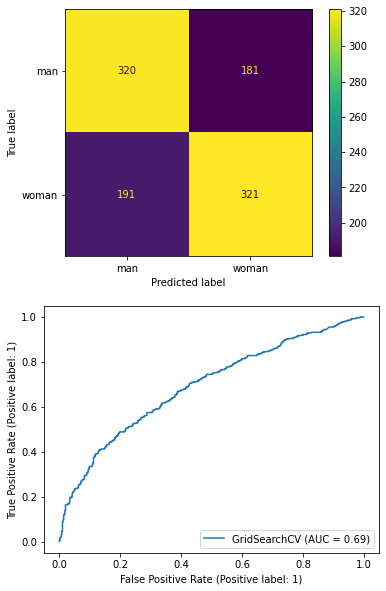

In [809]:
calculate(rand_grid);

#### AdaBoost+TFIDF through GridSearchCV

In [810]:

ada_pipe=Pipeline([
('tf',TfidfVectorizer()),
('ada',AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))

])

ada_pipe_params={
'tf__stop_words':[None],
'tf__ngram_range':[(1,1),(1,2),(1,3),(1,4),(2,2),(2,3),(3,3)],
# 'tf__max_df':[0.9,0.95],
# 'tf__min_df':[2,3,4,5],
# 'ada__n_estimators':[50,100],
'ada__base_estimator__max_depth':[1,2],
'ada__learning_rate':[0.9,1.01]
}


In [811]:
ada_grid=GridSearchCV(ada_pipe,param_grid=ada_pipe_params,cv=3,verbose=1,n_jobs=-1)
ada_grid.fit(X_train,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('ada',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))]),
             n_jobs=-1,
             param_grid={'ada__base_estimator__max_depth': [1, 2],
                         'ada__learning_rate': [0.9, 1.01],
                         'tf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4),
                                             (2, 2), (2, 3), (3, 3)],
                         'tf__stop_words': [None]},
             verbose=1)

Baseline accuracy : 0.5054294175715696
Best estimator : Pipeline(steps=[('tf', TfidfVectorizer()),
                ('ada',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                    learning_rate=1.01))])
Best score :  0.6185770750988142
Best parameters : {'ada__base_estimator__max_depth': 1, 'ada__learning_rate': 1.01, 'tf__ngram_range': (1, 1), 'tf__stop_words': None}
X_train Score : 0.6976284584980237
X_test Score  : 0.6377097729516288
F1 Train Score: 0.6758474576271187
F1 Test Score: 0.6058002148227712
Sensitivity: 0.5508
Specificity: 0.7265
Precision  : 0.673


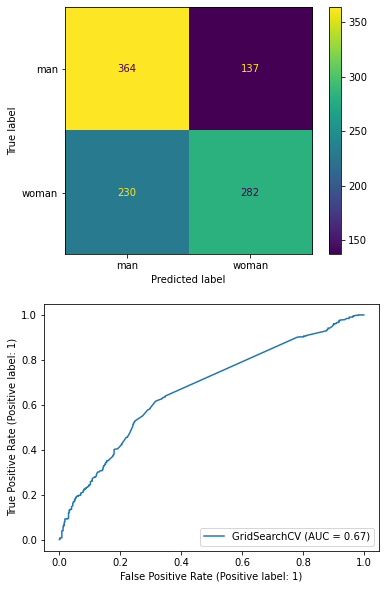

In [812]:
calculate(ada_grid);

#### Stacking with CountVectorizer

In [813]:

level1_estimators=[
    ('log_pipe',Pipeline([
        ('cv',CountVectorizer()),
        ('log', LogisticRegression(random_state=42,max_iter=10000))
    ])),
    ('knn_pipe',Pipeline([
        ('cv',CountVectorizer()),
        ('knn',KNeighborsClassifier())
    ])),
    ('bag_pipe',Pipeline([
        ('cv',CountVectorizer()),
        ('bag',BaggingClassifier())
    ])),
    ('ada_pipe',Pipeline([
        ('cv',CountVectorizer()),
        ('ada',AdaBoostClassifier())
    ]))
]

stacked_model=StackingClassifier(estimators=level1_estimators,final_estimator=LogisticRegression(max_iter=10000))

In [814]:
stacked_model.fit(X_train,y_train)

StackingClassifier(estimators=[('log_pipe',
                                Pipeline(steps=[('cv', CountVectorizer()),
                                                ('log',
                                                 LogisticRegression(max_iter=10000,
                                                                    random_state=42))])),
                               ('knn_pipe',
                                Pipeline(steps=[('cv', CountVectorizer()),
                                                ('knn',
                                                 KNeighborsClassifier())])),
                               ('bag_pipe',
                                Pipeline(steps=[('cv', CountVectorizer()),
                                                ('bag', BaggingClassifier())])),
                               ('ada_pipe',
                                Pipeline(steps=[('cv', CountVectorizer()),
                                                ('ada',
                        

In [816]:
stacked_model.score(X_train,y_train)

0.9795783926218709

In [815]:
stacked_model.score(X_test,y_test)

0.6386969397828233

----

#EDA on Results

### Logistic Regression

In [817]:
feature_coef=pd.DataFrame(log_grid.best_estimator_.named_steps.cvec.get_feature_names())
feature_coef["coef"]=log_grid.best_estimator_.named_steps.log_reg.coef_[0]
my_additional_stop_words=list(feature_coef.sort_values(by="coef", ascending=False).tail(30)[0])
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
my_additional_stop_words


['pregnant',
 'recommendation',
 'acknowledge',
 'reliable',
 'encounter',
 'lose weight',
 'quiet',
 'bunch',
 'little thing',
 'land',
 'upset',
 'guy guy',
 'face',
 'thing woman',
 'laundry',
 'photo',
 'interaction',
 'sad',
 'flag',
 'makeup',
 'bras',
 'fart',
 'product',
 'penis size',
 'class',
 'rude',
 'subreddit',
 'period',
 'lady',
 'cry']

In [819]:
predicted_log_reg=get_df_pred(log_grid)
predicted_log_reg_mismatch=predicted_log_reg[predicted_log_reg["real"]!=predicted_log_reg["predicted"]]
predicted_log_reg_mismatch.head(10)

,index,comment,real,predicted
1,1249,I woman post love picnic bookstore date man post want,1,0
6,3212,I collect play doll know odd desire play doll,0,1
8,618,drink month ago little drunk start stupid shit life mainly ignore work week begin join work conversation team day begin message slack leave town work week start monday morning office chat forth bit end exchange number share tea member team flirt non stop blatantly state appreciate intimidate I want plan hang week leave utterly confused month feel like elaborate prank happen,1,0
10,1606,I lot post site nut immediately feel ashamed kind thing watch feel regret shame wrong,1,0
13,2959,look find reasonably price shampoo conditioner thought hear like use,0,1
15,2745,favorite office place workplace lifehack help,0,1
17,1975,I know plan propose married know ring size partner fiancé wife,1,0
23,1752,month ago decide finally jungle pubic hair preferred method scissor cut lot month line hair near area look like mess grow way expect use scissor instead permanently trim forever,1,0
24,1648,work progress explanation boss manager letter sure reply amp dear greeting cold monday truly mystified wrong mistake perform duty clean driver desire learn utter incompetence year drive experience preference use google map instead waze wrong turn waze late time long eat breakfast day matter generous help strive equip driver job thank million advance way send driver collect vacuu...,1,0
27,3575,I apply job assessment job local university score applicant include professor engineer scientist think pretty good consider struggle math excite tell parent basically good like qualify job event planning position struggle believe finally able comfort zone apply job little challenging I know guess believe feel good,0,1


In [820]:
predicted_log_reg_match=predicted_log_reg[predicted_log_reg["real"]==predicted_log_reg["predicted"]]
predicted_log_reg_match.head(10)

,index,comment,real,predicted
0,3102,I random pink clot discharge come scared implantation bleed instance pregnancy second stop bad idea come minute later doubt pregnancy precum scared sure period come,0,0
2,3752,kind doubt hard time know anxiety anxiety bad,0,0
3,866,recently talk ex lightly mention probably clue girlfriend actually look like,1,1
4,2522,crazy sexual fantasy,0,0
5,3827,prefer bland food seasoned food,0,0
7,3573,answer,0,0
9,1326,kind long bear perspective today start good boss bad mood start unload truck cheer man friday polite way start stupid know feel happy friday okay continue work later start fucking end different different like different different technically point aggravate stick rest day feel kind hurt mean tell different mean way fast forward end day lock store shut light ask lock door yes scream I long hey l...,1,1
11,2975,awkward situation use live dude usually wear bras leave house find constrict uncomfortable wear bras usually soon home thing gay dude long term boyfriend chance perve I worried feel like rude uncomfortable dress properly proper polite worry feel weird bra relatively big boob definitely noticeable wear bra wear sport bras moment tight uncomfy support guy think wear bra wear,0,0
12,1974,guy date month distant texte hit want hang mantain friendship right agree thinking friend text day silly stuff like ask plan day series recommendation personally communicate friend day know appreciate want friendship receive text single day small silly thing force,1,1
14,821,I think bar like hooter,1,1


In [892]:
log_reg_features=pd.DataFrame(log_grid.best_estimator_.named_steps.log_reg.coef_[0])
log_reg_features['feature']=log_grid.best_estimator_.named_steps.cvec.get_feature_names_out()
log_reg_features.columns=['coef',"feature"]
log_reg_features[log_reg_features['coef']>0].sort_values(by='coef',ascending=False).head(20)

,coef,feature
62,2.172532,advice
1756,1.570825,guy think
1872,1.559255,help
546,1.386526,cheap
2974,1.273100,obvious
2747,1.271927,men
840,1.204971,dad
1007,1.140336,divorce
3981,1.131554,stick
298,1.109500,bar


### Naive Bayes

In [821]:
predicted_nb=get_df_pred(nb_grid)
predicted_nb_mismatch=predicted_nb[predicted_nb["real"]!=predicted_nb["predicted"]]
predicted_nb_mismatch.head(10)


,index,comment,real,predicted
4,2522,crazy sexual fantasy,0,1
6,3212,I collect play doll know odd desire play doll,0,1
8,618,drink month ago little drunk start stupid shit life mainly ignore work week begin join work conversation team day begin message slack leave town work week start monday morning office chat forth bit end exchange number share tea member team flirt non stop blatantly state appreciate intimidate I want plan hang week leave utterly confused month feel like elaborate prank happen,1,0
10,1606,I lot post site nut immediately feel ashamed kind thing watch feel regret shame wrong,1,0
12,1974,guy date month distant texte hit want hang mantain friendship right agree thinking friend text day silly stuff like ask plan day series recommendation personally communicate friend day know appreciate want friendship receive text single day small silly thing force,1,0
13,2959,look find reasonably price shampoo conditioner thought hear like use,0,1
15,2745,favorite office place workplace lifehack help,0,1
17,1975,I know plan propose married know ring size partner fiancé wife,1,0
23,1752,month ago decide finally jungle pubic hair preferred method scissor cut lot month line hair near area look like mess grow way expect use scissor instead permanently trim forever,1,0
24,1648,work progress explanation boss manager letter sure reply amp dear greeting cold monday truly mystified wrong mistake perform duty clean driver desire learn utter incompetence year drive experience preference use google map instead waze wrong turn waze late time long eat breakfast day matter generous help strive equip driver job thank million advance way send driver collect vacuu...,1,0


In [822]:
predicted_nb_match=predicted_nb[predicted_nb["real"]==predicted_nb["predicted"]]
predicted_nb_match.head(10)

,index,comment,real,predicted
0,3102,I random pink clot discharge come scared implantation bleed instance pregnancy second stop bad idea come minute later doubt pregnancy precum scared sure period come,0,0
1,1249,I woman post love picnic bookstore date man post want,1,1
2,3752,kind doubt hard time know anxiety anxiety bad,0,0
3,866,recently talk ex lightly mention probably clue girlfriend actually look like,1,1
5,3827,prefer bland food seasoned food,0,0
7,3573,answer,0,0
9,1326,kind long bear perspective today start good boss bad mood start unload truck cheer man friday polite way start stupid know feel happy friday okay continue work later start fucking end different different like different different technically point aggravate stick rest day feel kind hurt mean tell different mean way fast forward end day lock store shut light ask lock door yes scream I long hey l...,1,1
11,2975,awkward situation use live dude usually wear bras leave house find constrict uncomfortable wear bras usually soon home thing gay dude long term boyfriend chance perve I worried feel like rude uncomfortable dress properly proper polite worry feel weird bra relatively big boob definitely noticeable wear bra wear sport bras moment tight uncomfy support guy think wear bra wear,0,0
14,821,I think bar like hooter,1,1
16,3352,kind embarrassing young randomly decide shave small section belly button present self annoyance blonde fine hair noticeable hair grow dark little thick long pluck recently hair ingrown hair difficult little painful way deal ideally hair normal possible,0,0


----
### Decision Tree

In [823]:
predicted_dt=get_df_pred(d_tree_grid)
predicted_dt_mismatch=predicted_dt[predicted_dt["real"]!=predicted_dt["predicted"]]
predicted_dt_mismatch.head(10)

,index,comment,real,predicted
3,866,recently talk ex lightly mention probably clue girlfriend actually look like,1,0
8,618,drink month ago little drunk start stupid shit life mainly ignore work week begin join work conversation team day begin message slack leave town work week start monday morning office chat forth bit end exchange number share tea member team flirt non stop blatantly state appreciate intimidate I want plan hang week leave utterly confused month feel like elaborate prank happen,1,0
10,1606,I lot post site nut immediately feel ashamed kind thing watch feel regret shame wrong,1,0
11,2975,awkward situation use live dude usually wear bras leave house find constrict uncomfortable wear bras usually soon home thing gay dude long term boyfriend chance perve I worried feel like rude uncomfortable dress properly proper polite worry feel weird bra relatively big boob definitely noticeable wear bra wear sport bras moment tight uncomfy support guy think wear bra wear,0,1
14,821,I think bar like hooter,1,0
15,2745,favorite office place workplace lifehack help,0,1
17,1975,I know plan propose married know ring size partner fiancé wife,1,0
20,1939,I year old male consider fairly attractive little issue match date app eye bar month long term relationship know clueless feel weird ask girl right hook know plenty direct treat tinder date potential partner progress slow turn moreso seek potential partner point think thing thing feel awkward think place fucking leave,1,0
21,1033,apparently common thought accord tiktok like ask boyfriend spend day teleportation portal,1,0
23,1752,month ago decide finally jungle pubic hair preferred method scissor cut lot month line hair near area look like mess grow way expect use scissor instead permanently trim forever,1,0


In [824]:
predicted_dt_match=predicted_dt[predicted_dt["real"]==predicted_dt["predicted"]]
predicted_dt_match.head(10)

,index,comment,real,predicted
0,3102,I random pink clot discharge come scared implantation bleed instance pregnancy second stop bad idea come minute later doubt pregnancy precum scared sure period come,0,0
1,1249,I woman post love picnic bookstore date man post want,1,1
2,3752,kind doubt hard time know anxiety anxiety bad,0,0
4,2522,crazy sexual fantasy,0,0
5,3827,prefer bland food seasoned food,0,0
6,3212,I collect play doll know odd desire play doll,0,0
7,3573,answer,0,0
9,1326,kind long bear perspective today start good boss bad mood start unload truck cheer man friday polite way start stupid know feel happy friday okay continue work later start fucking end different different like different different technically point aggravate stick rest day feel kind hurt mean tell different mean way fast forward end day lock store shut light ask lock door yes scream I long hey l...,1,1
12,1974,guy date month distant texte hit want hang mantain friendship right agree thinking friend text day silly stuff like ask plan day series recommendation personally communicate friend day know appreciate want friendship receive text single day small silly thing force,1,1
13,2959,look find reasonably price shampoo conditioner thought hear like use,0,0


In [859]:
d_tree_features=pd.DataFrame(d_tree_grid.best_estimator_.named_steps.dt.feature_importances_)
d_tree_features['feature']=d_tree_grid.best_estimator_.named_steps.tf.get_feature_names_out()
d_tree_features.columns=['coef',"feature"]
d_tree_features[d_tree_features['coef']>0]

,coef,feature
112,0.152310,advice
355,0.030405,ask
1150,0.014195,come
2268,0.003456,feel
2315,0.031213,find
2460,0.004694,friend
2731,0.144382,guy
2777,0.014356,happen
2804,0.026312,head
2815,0.018527,hear


----
### Bagging

In [825]:

predicted_bag=get_df_pred(bag_grid)
predicted_bag_mismatch=predicted_bag[predicted_bag["real"]!=predicted_bag["predicted"]]
predicted_bag_mismatch.head(10)

,index,comment,real,predicted
2,3752,kind doubt hard time know anxiety anxiety bad,0,1
4,2522,crazy sexual fantasy,0,1
7,3573,answer,0,1
10,1606,I lot post site nut immediately feel ashamed kind thing watch feel regret shame wrong,1,0
11,2975,awkward situation use live dude usually wear bras leave house find constrict uncomfortable wear bras usually soon home thing gay dude long term boyfriend chance perve I worried feel like rude uncomfortable dress properly proper polite worry feel weird bra relatively big boob definitely noticeable wear bra wear sport bras moment tight uncomfy support guy think wear bra wear,0,1
15,2745,favorite office place workplace lifehack help,0,1
16,3352,kind embarrassing young randomly decide shave small section belly button present self annoyance blonde fine hair noticeable hair grow dark little thick long pluck recently hair ingrown hair difficult little painful way deal ideally hair normal possible,0,1
17,1975,I know plan propose married know ring size partner fiancé wife,1,0
20,1939,I year old male consider fairly attractive little issue match date app eye bar month long term relationship know clueless feel weird ask girl right hook know plenty direct treat tinder date potential partner progress slow turn moreso seek potential partner point think thing thing feel awkward think place fucking leave,1,0
23,1752,month ago decide finally jungle pubic hair preferred method scissor cut lot month line hair near area look like mess grow way expect use scissor instead permanently trim forever,1,0


In [826]:
predicted_bag_match=predicted_bag[predicted_bag["real"]==predicted_bag["predicted"]]
predicted_bag_match.head(10)

,index,comment,real,predicted
0,3102,I random pink clot discharge come scared implantation bleed instance pregnancy second stop bad idea come minute later doubt pregnancy precum scared sure period come,0,0
1,1249,I woman post love picnic bookstore date man post want,1,1
3,866,recently talk ex lightly mention probably clue girlfriend actually look like,1,1
5,3827,prefer bland food seasoned food,0,0
6,3212,I collect play doll know odd desire play doll,0,0
8,618,drink month ago little drunk start stupid shit life mainly ignore work week begin join work conversation team day begin message slack leave town work week start monday morning office chat forth bit end exchange number share tea member team flirt non stop blatantly state appreciate intimidate I want plan hang week leave utterly confused month feel like elaborate prank happen,1,1
9,1326,kind long bear perspective today start good boss bad mood start unload truck cheer man friday polite way start stupid know feel happy friday okay continue work later start fucking end different different like different different technically point aggravate stick rest day feel kind hurt mean tell different mean way fast forward end day lock store shut light ask lock door yes scream I long hey l...,1,1
12,1974,guy date month distant texte hit want hang mantain friendship right agree thinking friend text day silly stuff like ask plan day series recommendation personally communicate friend day know appreciate want friendship receive text single day small silly thing force,1,1
13,2959,look find reasonably price shampoo conditioner thought hear like use,0,0
14,821,I think bar like hooter,1,1


In [862]:
bag_grid.best_estimator_.named_steps

{'tf': TfidfVectorizer(ngram_range=(1, 3)),
 'bag': BaggingClassifier(n_estimators=5, random_state=42)}

----
### Random Forest

In [864]:
predicted_rf=get_df_pred(rand_grid)
predicted_rf_mismatch=predicted_rf[predicted_rf["real"]!=predicted_rf["predicted"]]
predicted_rf_mismatch.head(10)


,index,comment,real,predicted
4,2522,crazy sexual fantasy,0,1
10,1606,I lot post site nut immediately feel ashamed kind thing watch feel regret shame wrong,1,0
11,2975,awkward situation use live dude usually wear bras leave house find constrict uncomfortable wear bras usually soon home thing gay dude long term boyfriend chance perve I worried feel like rude uncomfortable dress properly proper polite worry feel weird bra relatively big boob definitely noticeable wear bra wear sport bras moment tight uncomfy support guy think wear bra wear,0,1
15,2745,favorite office place workplace lifehack help,0,1
16,3352,kind embarrassing young randomly decide shave small section belly button present self annoyance blonde fine hair noticeable hair grow dark little thick long pluck recently hair ingrown hair difficult little painful way deal ideally hair normal possible,0,1
17,1975,I know plan propose married know ring size partner fiancé wife,1,0
23,1752,month ago decide finally jungle pubic hair preferred method scissor cut lot month line hair near area look like mess grow way expect use scissor instead permanently trim forever,1,0
27,3575,I apply job assessment job local university score applicant include professor engineer scientist think pretty good consider struggle math excite tell parent basically good like qualify job event planning position struggle believe finally able comfort zone apply job little challenging I know guess believe feel good,0,1
34,1742,I lot people social medium thing like flirt want disappear actually ask question,1,0
40,750,I girl boss like handsome married obviously leave job near,1,0


In [865]:
predicted_rf_match=predicted_rf[predicted_rf["real"]==predicted_rf["predicted"]]
predicted_rf_match.head(10)

,index,comment,real,predicted
0,3102,I random pink clot discharge come scared implantation bleed instance pregnancy second stop bad idea come minute later doubt pregnancy precum scared sure period come,0,0
1,1249,I woman post love picnic bookstore date man post want,1,1
2,3752,kind doubt hard time know anxiety anxiety bad,0,0
3,866,recently talk ex lightly mention probably clue girlfriend actually look like,1,1
5,3827,prefer bland food seasoned food,0,0
6,3212,I collect play doll know odd desire play doll,0,0
7,3573,answer,0,0
8,618,drink month ago little drunk start stupid shit life mainly ignore work week begin join work conversation team day begin message slack leave town work week start monday morning office chat forth bit end exchange number share tea member team flirt non stop blatantly state appreciate intimidate I want plan hang week leave utterly confused month feel like elaborate prank happen,1,1
9,1326,kind long bear perspective today start good boss bad mood start unload truck cheer man friday polite way start stupid know feel happy friday okay continue work later start fucking end different different like different different technically point aggravate stick rest day feel kind hurt mean tell different mean way fast forward end day lock store shut light ask lock door yes scream I long hey l...,1,1
12,1974,guy date month distant texte hit want hang mantain friendship right agree thinking friend text day silly stuff like ask plan day series recommendation personally communicate friend day know appreciate want friendship receive text single day small silly thing force,1,1


In [871]:
rand_features=pd.DataFrame(rand_grid.best_estimator_.named_steps.rand.feature_importances_)
rand_features['feature']=rand_grid.best_estimator_.named_steps.cv.get_feature_names_out()
rand_features.columns=['coef',"feature"]
rand_features[rand_features['coef']>0].sort_values(by='coef',ascending=False).head(20)

,coef,feature
29,0.019896,advice
1085,0.019338,man
792,0.016931,help
742,0.012580,guy
981,0.012544,like
1876,0.011760,want
974,0.010581,life
1770,0.008497,time
1684,0.007435,talk
1034,0.006617,live


----
### AdaBoost

In [829]:

predicted_ada=get_df_pred(ada_grid)
predicted_ada_mismatch=predicted_ada[predicted_ada["real"]!=predicted_ada["predicted"]]
predicted_ada_mismatch.head(10)


,index,comment,real,predicted
2,3752,kind doubt hard time know anxiety anxiety bad,0,1
10,1606,I lot post site nut immediately feel ashamed kind thing watch feel regret shame wrong,1,0
15,2745,favorite office place workplace lifehack help,0,1
16,3352,kind embarrassing young randomly decide shave small section belly button present self annoyance blonde fine hair noticeable hair grow dark little thick long pluck recently hair ingrown hair difficult little painful way deal ideally hair normal possible,0,1
17,1975,I know plan propose married know ring size partner fiancé wife,1,0
21,1033,apparently common thought accord tiktok like ask boyfriend spend day teleportation portal,1,0
23,1752,month ago decide finally jungle pubic hair preferred method scissor cut lot month line hair near area look like mess grow way expect use scissor instead permanently trim forever,1,0
34,1742,I lot people social medium thing like flirt want disappear actually ask question,1,0
39,3261,great female character write great female character,0,1
40,750,I girl boss like handsome married obviously leave job near,1,0


In [830]:
predicted_ada_match=predicted_ada[predicted_ada["real"]==predicted_ada["predicted"]]
predicted_ada_match.head(10)

,index,comment,real,predicted
0,3102,I random pink clot discharge come scared implantation bleed instance pregnancy second stop bad idea come minute later doubt pregnancy precum scared sure period come,0,0
1,1249,I woman post love picnic bookstore date man post want,1,1
3,866,recently talk ex lightly mention probably clue girlfriend actually look like,1,1
4,2522,crazy sexual fantasy,0,0
5,3827,prefer bland food seasoned food,0,0
6,3212,I collect play doll know odd desire play doll,0,0
7,3573,answer,0,0
8,618,drink month ago little drunk start stupid shit life mainly ignore work week begin join work conversation team day begin message slack leave town work week start monday morning office chat forth bit end exchange number share tea member team flirt non stop blatantly state appreciate intimidate I want plan hang week leave utterly confused month feel like elaborate prank happen,1,1
9,1326,kind long bear perspective today start good boss bad mood start unload truck cheer man friday polite way start stupid know feel happy friday okay continue work later start fucking end different different like different different technically point aggravate stick rest day feel kind hurt mean tell different mean way fast forward end day lock store shut light ask lock door yes scream I long hey l...,1,1
11,2975,awkward situation use live dude usually wear bras leave house find constrict uncomfortable wear bras usually soon home thing gay dude long term boyfriend chance perve I worried feel like rude uncomfortable dress properly proper polite worry feel weird bra relatively big boob definitely noticeable wear bra wear sport bras moment tight uncomfy support guy think wear bra wear,0,0


In [873]:
ada_grid.best_estimator_.named_steps


{'tf': TfidfVectorizer(),
 'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                    learning_rate=1.01)}

In [875]:
ada_features=pd.DataFrame(ada_grid.best_estimator_.named_steps.ada.feature_importances_)
ada_features['feature']=ada_grid.best_estimator_.named_steps.tf.get_feature_names_out()
ada_features.columns=['coef',"feature"]
ada_features[ada_features['coef']>0].sort_values(by='coef',ascending=False)

,coef,feature
112,0.02,advice
5770,0.02,start
4429,0.02,period
4446,0.02,perspective
4471,0.02,photo
4476,0.02,physical
4563,0.02,point
4665,0.02,pregnancy
4878,0.02,random
5200,0.02,run


----
### Stacked Model

In [831]:
predicted_stack=get_df_pred(stacked_model)
predicted_stack_mismatch=predicted_stack[predicted_stack["real"]!=predicted_stack["predicted"]]
predicted_stack_mismatch.head(10)

,index,comment,real,predicted
6,3212,I collect play doll know odd desire play doll,0,1
7,3573,answer,0,1
8,618,drink month ago little drunk start stupid shit life mainly ignore work week begin join work conversation team day begin message slack leave town work week start monday morning office chat forth bit end exchange number share tea member team flirt non stop blatantly state appreciate intimidate I want plan hang week leave utterly confused month feel like elaborate prank happen,1,0
15,2745,favorite office place workplace lifehack help,0,1
16,3352,kind embarrassing young randomly decide shave small section belly button present self annoyance blonde fine hair noticeable hair grow dark little thick long pluck recently hair ingrown hair difficult little painful way deal ideally hair normal possible,0,1
17,1975,I know plan propose married know ring size partner fiancé wife,1,0
21,1033,apparently common thought accord tiktok like ask boyfriend spend day teleportation portal,1,0
22,3680,rephrase question deal shitty law,0,1
23,1752,month ago decide finally jungle pubic hair preferred method scissor cut lot month line hair near area look like mess grow way expect use scissor instead permanently trim forever,1,0
24,1648,work progress explanation boss manager letter sure reply amp dear greeting cold monday truly mystified wrong mistake perform duty clean driver desire learn utter incompetence year drive experience preference use google map instead waze wrong turn waze late time long eat breakfast day matter generous help strive equip driver job thank million advance way send driver collect vacuu...,1,0


In [832]:
predicted_atack_match=predicted_stack[predicted_stack["real"]==predicted_stack["predicted"]]
predicted_atack_match.head(10)

,index,comment,real,predicted
0,3102,I random pink clot discharge come scared implantation bleed instance pregnancy second stop bad idea come minute later doubt pregnancy precum scared sure period come,0,0
1,1249,I woman post love picnic bookstore date man post want,1,1
2,3752,kind doubt hard time know anxiety anxiety bad,0,0
3,866,recently talk ex lightly mention probably clue girlfriend actually look like,1,1
4,2522,crazy sexual fantasy,0,0
5,3827,prefer bland food seasoned food,0,0
9,1326,kind long bear perspective today start good boss bad mood start unload truck cheer man friday polite way start stupid know feel happy friday okay continue work later start fucking end different different like different different technically point aggravate stick rest day feel kind hurt mean tell different mean way fast forward end day lock store shut light ask lock door yes scream I long hey l...,1,1
10,1606,I lot post site nut immediately feel ashamed kind thing watch feel regret shame wrong,1,1
11,2975,awkward situation use live dude usually wear bras leave house find constrict uncomfortable wear bras usually soon home thing gay dude long term boyfriend chance perve I worried feel like rude uncomfortable dress properly proper polite worry feel weird bra relatively big boob definitely noticeable wear bra wear sport bras moment tight uncomfy support guy think wear bra wear,0,0
12,1974,guy date month distant texte hit want hang mantain friendship right agree thinking friend text day silly stuff like ask plan day series recommendation personally communicate friend day know appreciate want friendship receive text single day small silly thing force,1,1
